In [1]:
import numpy as np

#Inputs
End effector co-ordinates

In [7]:
x=float(input("X : "))
y=float(input("Y : "))
z=float(input("Z : "))

pos=[x,y,z]

X : 1
Y : 1
Z : 1


Link lengths

In [4]:
d1=float(input("Length of first link (d1) : "))
d2=float(input("Length of second link (d2) : "))
d3=float(input("Length of base link (d3) (height) : "))

links = [d1,d2,d3]

Length of first link (d1) : 1
Length of second link (d2) : 1
Length of base link (d3) (height) : 2


# Inverse Position Kinematics 
The function below implements the inverse position kinematics of SCARA (RRP) manipulator.

Function input : invPos_RRP([x, y, z], [d1, d2, d3])

Function Output : Output is a 2 X 3 matrix. Each row contains joint parameters for that configuration. Each row is structured as :

[theta1, theta2, d4]

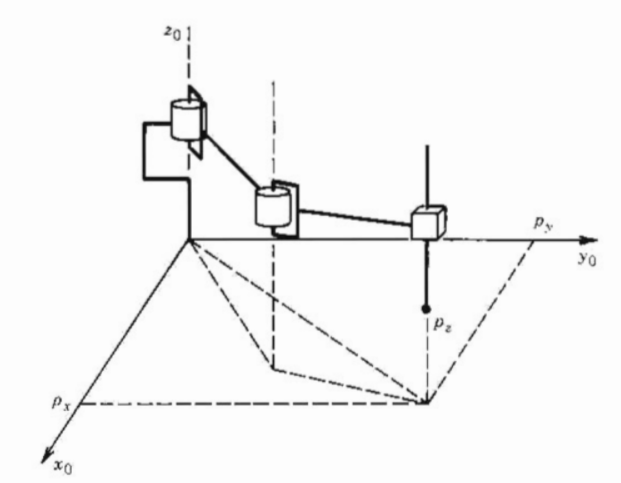

In [5]:
def invPos_RRP(pos,linkl):
  r= ((pos[0]**2+pos[1]**2-linkl[0]**2-linkl[1]**2)/(2*linkl[0]*linkl[1]))**(0.5)

  p=r/((1-r**2)**0.5)
  theta2 = np.arctan([p,-p])
  theta1 = np.arctan(pos[1]/pos[0])-np.arctan(linkl[1]*np.sin(theta2)/(linkl[0]+linkl[1]*np.cos(theta2)))

  theta1=np.matrix(theta1)
  theta2=np.matrix(theta2)

  d4=linkl[2]-pos[2]
  d=np.matrix([[d4,d4]])

  para=np.concatenate((theta1.T,theta2.T),axis=1)
  para=np.concatenate((para,d.T),axis=1)
  return para

In [8]:
print(invPos_RRP(pos,links))

[[ 0.78539816  0.          1.        ]
 [ 0.78539816 -0.          1.        ]]
